# Data Analysis Jour 01 Partie 04
## Introduction
Ce notebook est une introduction à l'analyse de données avec Python. Nous allons explorer un jeu de données sur les performances des étudiants.

### Prérequis
- Python 3.12.0
- Python 3.12.0
- Bibliothèque pandas pour l'analyse de données
- Bibliothèque matplotlib pour la visualisation
- Bibliothèque scipy pour les stats

### Objectifs
- Importer et visualiser les données
- Corrélation de Pearson
- P-Value
- Tables de contingence
- ANOVA

## Installation des dépendances
Exécuter cette cellule pour installer la bibliothèque tabulate nécessaire pour l'affichage des données.

In [ ]:
!pip install pandas matplotlib scipy

### Importation des bibliothèques
Exécuter cette cellule pour importer les bibliothèques nécessaires.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Les données
Cette cellule définit le chemin vers le fichier CSV contenant les données des étudiants.

In [6]:
file = "Classeur1.csv"

### Importation et stockage des données
Charger les données dans un DataFrame

In [7]:
data = pd.read_csv(file, sep=';')

### Affichage des données
Exécuter cette cellule pour afficher les 5 premières lignes des données importées.

In [8]:
data.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,100000,36 months,1144,32948,B,B4,Marketing,10+ years,RENT,1170000,...,01-06-90,160,0,363690,418.0,250,w,INDIVIDUAL,0.0,0.0
1,80000,36 months,1199,26568,B,B5,Credit analyst,4 years,MORTGAGE,650000,...,01-07-04,170,0,201310,533.0,270,f,INDIVIDUAL,30.0,0.0
2,156000,36 months,1049,50697,B,B3,Statistician,< 1 year,RENT,430570,...,01-08-07,130,0,119870,922.0,260,f,INDIVIDUAL,0.0,0.0
3,72000,36 months,649,22065,A,A2,Client Advocate,6 years,RENT,540000,...,01-09-06,60,0,54720,215.0,130,f,INDIVIDUAL,0.0,0.0
4,243750,60 months,1727,60933,C,C5,Destiny Management Inc.,9 years,MORTGAGE,550000,...,01-03-99,130,0,245840,698.0,430,f,INDIVIDUAL,10.0,0.0


## Mean_score

Caluler la moyenne de notes et puis grouper les avec parents_education en calculant la moyenne des 'mean_score', stocker les résultats dans un nouveau DataFrame parents_scores

In [9]:
data_means = data.mean(axis=1, numeric_only=True)
data_means.head()

0    139269.500000
1     80190.416667
2     63398.083333
3     57488.750000
4     92242.750000
dtype: float64

### Corrélation de Pearson et P-Value
Exécuter la Corrélation de Pearson sur toutes les données.

In [10]:
data.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.113698,0.819253,0.266433,0.041861,0.198556,-0.077779,0.328320,0.097519,0.223886,0.222315,-0.106539
int_rate,0.113698,1.000000,0.088837,-0.031891,0.114494,0.017784,0.066392,-0.013588,0.197838,-0.022161,-0.067433,0.058858
installment,0.819253,0.088837,1.000000,0.223430,0.034233,0.162125,-0.059566,0.269246,0.103721,0.174769,0.165969,-0.085882
annual_inc,0.266433,-0.031891,0.223430,1.000000,-0.097196,0.098817,-0.011734,0.233280,0.031311,0.144044,0.188168,-0.039930
dti,0.041861,0.114494,0.034233,-0.097196,1.000000,0.246128,-0.031086,0.119154,0.153902,0.187936,-0.039054,-0.026304
open_acc,0.198556,0.017784,0.162125,0.098817,0.246128,1.000000,-0.018392,0.221192,-0.131849,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.066392,-0.059566,-0.011734,-0.031086,-0.018392,1.000000,-0.101664,-0.075075,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.013588,0.269246,0.233280,0.119154,0.221192,-0.101664,1.000000,0.222282,0.191616,0.194925,-0.124532
revol_util,0.097519,0.197838,0.103721,0.031311,0.153902,-0.131849,-0.075075,0.222282,1.000000,-0.104019,0.007514,-0.085634
total_acc,0.223886,-0.022161,0.174769,0.144044,0.187936,0.680728,0.019723,0.191616,-0.104019,1.000000,0.381072,0.042035


Interprète les résultats :
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

Cette fois-ci utilise la lib 'stast' de 'scipy', par exemple : math_score et reading_score

In [60]:
pearson_coef, p_value = stats.pearsonr(data['loan_amnt'], data['installment'])
print(f"The Pearson Correlation Coefficient is {pearson_coef} with a P-value of P = {p_value}")  

The Pearson Correlation Coefficient is 0.819252579592636 with a P-value of P = 0.0


Interprète les résultats :
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

Vérifier cette relation également graphiquement, en utilisant la lib Pandas

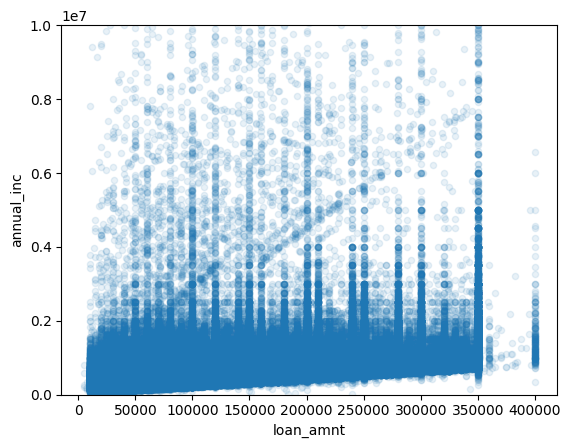

In [68]:
from matplotlib.pyplot import ylim
from pandas.plotting import scatter_matrix
%matplotlib inline
data.plot(kind='scatter', x='loan_amnt', y='annual_inc', alpha=0.1), ylim(0, 10000000);

## Table de contingence

Utiliser la fonction crosstab avec les deux variables parents_education et test_prep_course pour afficher une table de contingence

In [23]:
table = pd.crosstab(data['home_ownership'],data['term'])
table

term,36 months,60 months
home_ownership,,
ANY,2,1
MORTGAGE,143071,55277
NONE,27,4
OTHER,109,3
OWN,29305,8441
RENT,129491,30299


### Test du khi2

Réaliser le test du khi2, afin de tester l'hypothère H0H0

In [26]:
from scipy.stats import chi2_contingency
resultats_test = chi2_contingency(table)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(f"statistic: {statistique}\nP-value: {p_valeur:.6f}\nDegrees of freedom: {degre_liberte}")


statistic: 3951.659415549171
P-value: 0.000000
Degrees of freedom: 5


### V de Cramer

Mesurer le niveau de corrélation entre deux variables qualitatives. Pour cela, utilise le V de Cramer corrigé pour contrer le biais.

Pour rappel, ci-dessous les formules de V de cramer corrigé :

$\tilde{V} = \sqrt{\frac{\tilde{\varphi}^2}{\min(\tilde{k}-1,\tilde{r}-1)}
}$

$\tilde{\varphi}^2 = \max \left(0, \varphi^2 - \frac{(k-1)(r-1)}{n-1}\right)$

$\tilde{k} = k - \frac{(k-1)^2}{n-1}$

$\tilde{r} = r - \frac{(r-1)^2}{n-1}$

In [27]:
# Function pour calculer le V de Cramer
def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return float(np.sqrt(phi/min(k_corr - 1,r_corr - 1)))


In [28]:
V_Cramer(table, data.shape[0])

0.09982776077274033

## ANOVA

L'analyse de la variance (ANOVA) est une méthode statistique permettant de tester l'existence de différences significatives entre les moyennes de deux groupes ou plus. L'ANOVA renvoie deux paramètres :
- F-Score : l'ANOVA suppose que les moyennes de tous les groupes sont identiques, calcule l'écart des moyennes réelles par rapport à l'hypothèse et le rapporte sous la forme d'un score du test F. Plus ce score est élevé, plus l'écart est important. Plus le score est élevé, plus la différence entre les moyennes est importante.

- P-Value indique dans quelle mesure la valeur calculée est statistiquement significative.

Combien de valeurs uniques on a dans la colonne race/ethnicity ?

In [29]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

Créer un nouveau DataFrame avec uniquement les colonnes 'race/ethnicity' et 'mean_score'. Groupe le DataFrame par race/ethnicity et tu peux obtenir les valeurs du groupe à l'aide de la méthode « get_group ».

In [63]:
sub_group = data[['emp_title','annual_inc']].groupby(['emp_title'])
sub_group.get_group(("Teacher",))['annual_inc'].values


array([ 790000,  950000,  600000, ..., 1200000,  525000,  795000],
      shape=(4389,))

Tu peux maintenant utiliser la fonction « f_oneway » du module « stats » pour obtenir le score du test F et la valeur P. Par exemple group B, groupe C et group A.

In [64]:
f_val, p_val = stats.f_oneway(
    sub_group.get_group(("Teacher",))["annual_inc"],
    sub_group.get_group(("Doctor",))["annual_inc"]
)
print(f"ANOVA results: F = {f_val}, P = {p_val}")

ANOVA results: F = 113.60036966829855, P = 3.314121066471451e-26


Tu peux desormais tester d'autres combinaisons. Par exemple group B, groupe D et group E.

In [57]:
f_val, p_val = stats.f_oneway(
    sub_group.get_group((" 60 months",))["annual_inc"],
    sub_group.get_group((" 36 months",))["annual_inc"]
)
print(f"ANOVA results: F = {f_val}, P = {p_val}")

ANOVA results: F = 999.1768843727289, P = 5.093007560344135e-219
